[2.85406274 5.        ]
[1.         0.99738077 0.99476633 0.99215675 0.98955212 0.98695251
 0.984358   0.98176867 0.97918459 0.97660583 0.97403246 0.97146456
 0.96890219 0.96634541 0.96379429 0.9612489  0.9587093  0.95617554
 0.95364769 0.9511258  0.94860993 0.94610013 0.94359646 0.94109898
 0.93860772 0.93612274 0.93364408 0.93117181 0.92870595 0.92624655
 0.92379366 0.92134732 0.91890756 0.91647443 0.91404797 0.91162821
 0.90921518 0.90680892 0.90440947 0.90201686 0.89963111 0.89725225
 0.89488033 0.89251535 0.89015735 0.88780636 0.8854624  0.88312549
 0.88079565 0.87847291 0.87615728 0.87384879 0.87154745 0.86925329
 0.86696631 0.86468653 0.86241397 0.86014865 0.85789057 0.85563974
 0.85339619 0.85115991 0.84893092 0.84670922 0.84449484 0.84228776
 0.840088   0.83789557 0.83571046 0.83353269 0.83136226 0.82919916
 0.82704341 0.824895   0.82275393 0.82062021 0.81849383 0.8163748
 0.8142631  0.81215875 0.81006172 0.80797204 0.80588967 0.80381464
 0.80174692 0.79968651 0.79763341 0.795

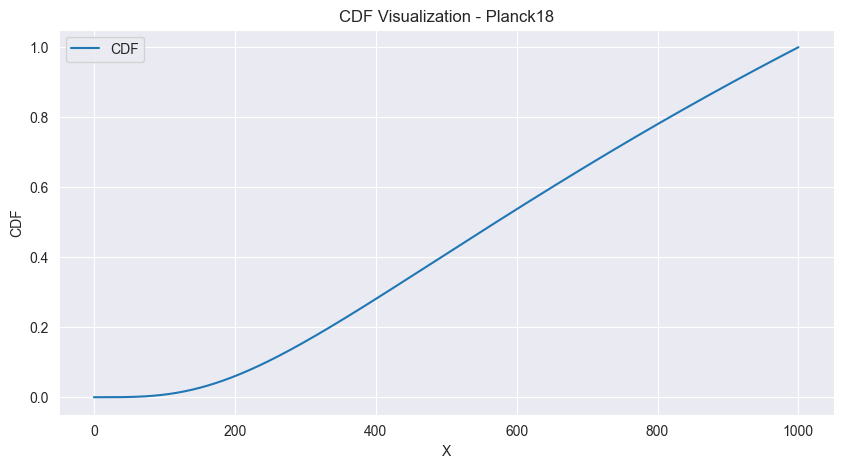

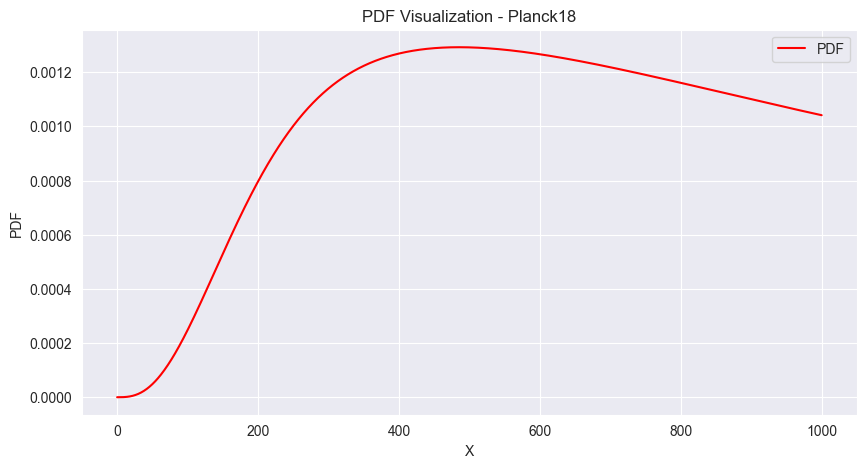

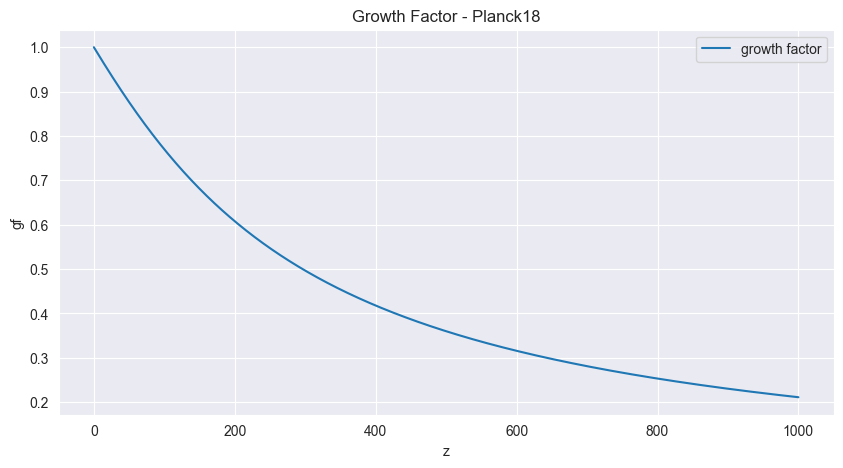

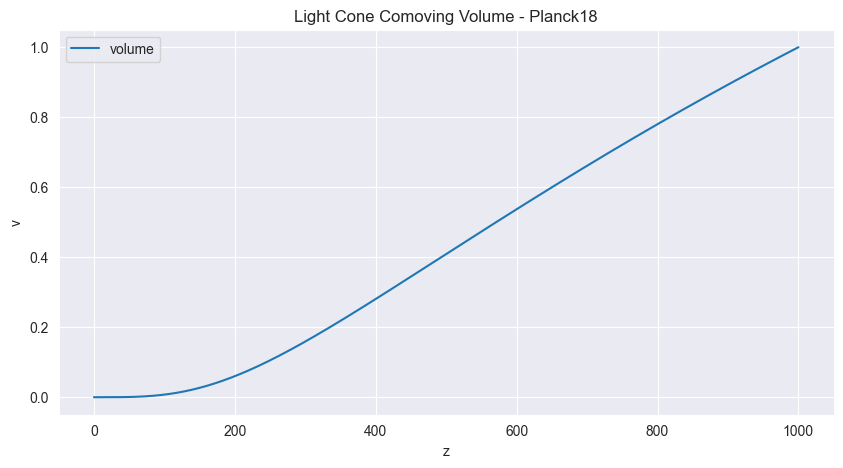

[2.86305023 5.        ]
[1.         0.99733862 0.99468243 0.99203151 0.98938592 0.98674576
 0.9841111  0.98148202 0.97885858 0.97624085 0.97362891 0.97102283
 0.96842267 0.9658285  0.96324038 0.96065837 0.95808254 0.95551293
 0.95294962 0.95039265 0.94784208 0.94529797 0.94276036 0.9402293
 0.93770485 0.93518705 0.93267594 0.93017158 0.92767401 0.92518326
 0.92269938 0.92022241 0.91775238 0.91528934 0.91283331 0.91038434
 0.90794246 0.90550769 0.90308007 0.90065964 0.89824641 0.89584041
 0.89344168 0.89105023 0.88866609 0.88628929 0.88391984 0.88155777
 0.8792031  0.87685584 0.87451602 0.87218364 0.86985873 0.86754131
 0.86523137 0.86292895 0.86063405 0.85834667 0.85606684 0.85379457
 0.85152985 0.8492727  0.84702313 0.84478114 0.84254674 0.84031993
 0.83810071 0.8358891  0.83368509 0.83148868 0.82929987 0.82711867
 0.82494508 0.82277909 0.8206207  0.81846991 0.81632672 0.81419112
 0.8120631  0.80994268 0.80782983 0.80572455 0.80362684 0.80153669
 0.7994541  0.79737904 0.79531152 0.793

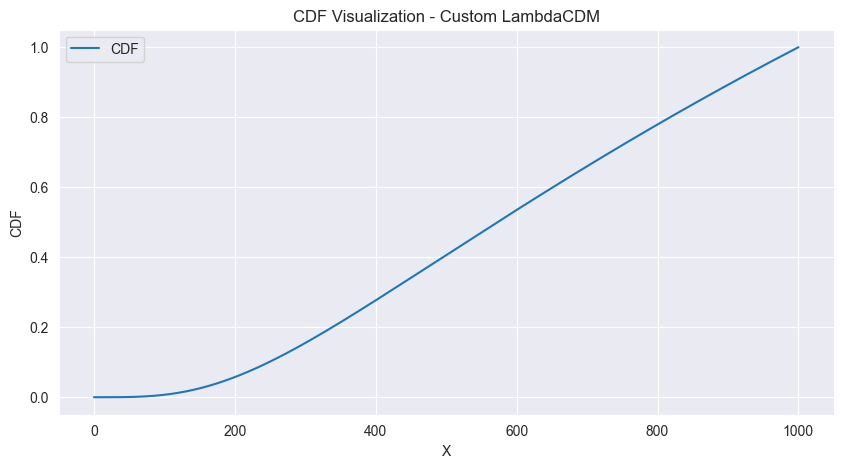

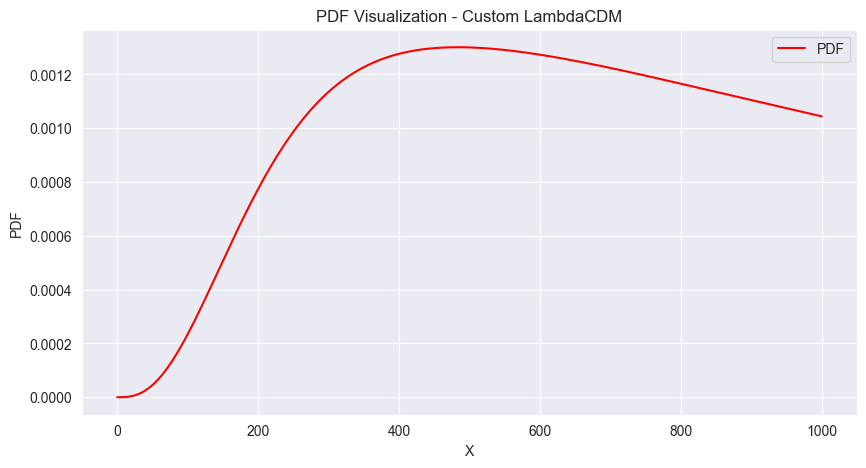

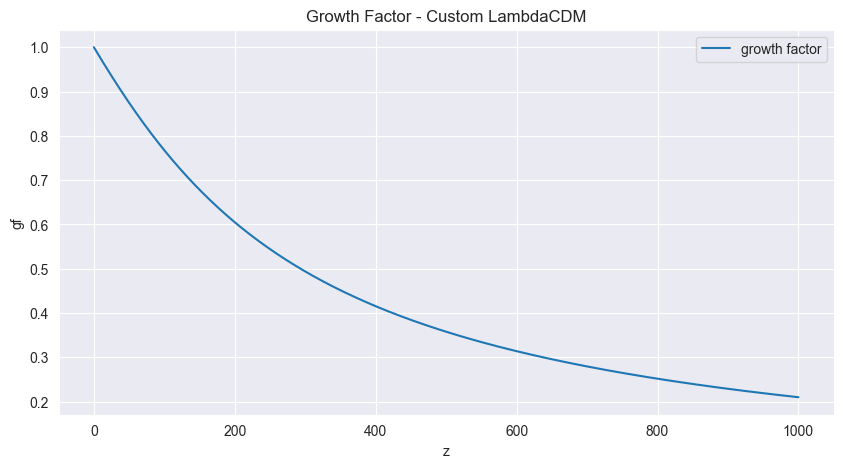

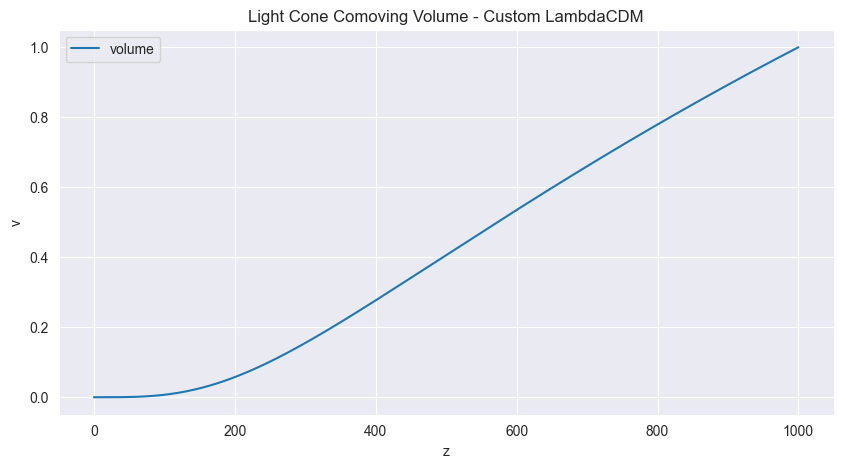

In [7]:
from sim_pipeline.Skypy_halos_duplicate import power_spectrum as ps
from sim_pipeline.Skypy_halos_duplicate.halos import mass
from sim_pipeline.Halos.halos import redshift_mass_sheet_correction_array_from_comoving_density
from astropy.units import deg
import numpy as np
import matplotlib.pyplot as plt


def plot_cosmological_quantities(cosmology):
    z_max = 5
    m_max = 1.0E+16
    z_range = np.linspace(0, z_max, 1000)
    wavenumber = np.logspace(-3, 1, 1000)
    skyarea = 0.0001 * deg**2
    ps_params = {
        'wavenumber': wavenumber,
        'A_s': 2.1982e-09,
        'n_s': 0.969453,
        'cosmology': cosmology
    }
    power_spectrum = ps.eisenstein_hu(**ps_params)
    collapse_function = mass.ellipsoidal_collapse_function

    rmsc_params = {
        'redshift_list': z_range,
        'sky_area': skyarea,
        'cosmology': cosmology,
        'm_min': 1.0E+13,
        'm_max': m_max,
        'resolution': 1000,
        'wavenumber': wavenumber,
        'power_spectrum': power_spectrum,
        'collapse_function': collapse_function,
        'params': [0.3, 0.7, 0.3, 1.686]
    }

    data_cdf, result, gf, cosmogeo = redshift_mass_sheet_correction_array_from_comoving_density(**rmsc_params)
    print(result)
    print(gf)
    x = np.linspace(0, len(data_cdf), len(data_cdf))

    # Plot CDF
    plt.figure(figsize=(10, 5))
    plt.plot(x, data_cdf, label='CDF')
    plt.title(f'CDF Visualization - {cosmology.name}')
    plt.xlabel('X')
    plt.ylabel('CDF')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Compute the PDF using numerical derivative
    data_pdf = np.gradient(data_cdf)

    # Plot PDF
    plt.figure(figsize=(10, 5))
    plt.plot(x, data_pdf, label='PDF', color='r')
    plt.title(f'PDF Visualization - {cosmology.name}')
    plt.xlabel('X')
    plt.ylabel('PDF')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(x, gf, label='growth factor')
    plt.title(f'Growth Factor - {cosmology.name}')
    plt.xlabel('z')
    plt.ylabel('gf')
    plt.grid(True)
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 5))
    plt.plot(x, cosmogeo, label='volume')
    plt.title(f'Light Cone Comoving Volume - {cosmology.name}')
    plt.xlabel('z')
    plt.ylabel('v')
    plt.grid(True)
    plt.legend()
    plt.show()


# Example Usage
from astropy.cosmology import default_cosmology
cosmology = default_cosmology.get()
plot_cosmological_quantities(cosmology)
# Using the default LambdaCDM cosmology

from astropy.cosmology import LambdaCDM
# Using a custom LambdaCDM cosmology with baryon density and CMB temperature
cosmology_custom = LambdaCDM(H0=68, Om0=0.32, Ode0=0.68, Ob0=0.02, Tcmb0=2.7255, name="Custom LambdaCDM")
plot_cosmological_quantities(cosmology_custom)
